In [1]:
import numpy as np

from hoi.metrics import RSI, Oinfo
from hoi.utils import get_nbest_mult
from hoi.plot import plot_landscape
import xgi

import matplotlib.pyplot as plt
plt.style.use('ggplot')



c:\Users\matte\anaconda3\envs\base_mmm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Definition

The O-information is a multivariate measure of information capable of disentangling whether a subset of a variable `X` is dominated by redunancy or synergy. The O-information is defined as the difference between the Total Correlation and the Dual Total Correlation. As both quantities are respectively linked to redundancy and synergy, the O-information is going to be positive when a system is dominated by redundant interactions and negative when the system is dominated by synergistic interactions. The mathematical definition of the O-information is given by:

$$
\Omega(X^{n})  =  TC(X^{n}) - DTC(X^{n}) \\
               =  (n - 2)H(X^{n}) + \sum_{j=1}^{n} \left[ H(X_{j}) - H(X_{-j}^{n}) \right]
$$

---

## Simulate Univariate Redundancy

A very simple way to simulate redundancy between three variables, is to copy one of the three variables in the other two. This is what is done step-by-step in the following cell. 

For further information about how to simulate redundant and synergistic interactions, check out the example: [Simulating Redundant and Synergistic Interactions](https://example.com/sphx_glr_auto_examples_tutorials_plot_sim_red_syn.py).

In [2]:

# lets start by simulating a variable x with 200 samples and 7 features
x = np.random.rand(200, 7)

# we now send the variable x1 in the column (3, 5) of x
x[:, 3] += x[:, 1]
x[:, 5] += x[:, 1]

# define the Oinfo model and launch it
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=3)

# now we can take a look at the multiplets with the highest and lowest values
# of Oinfo. We will only select the multiplets of size 3 here
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     20      3  0.174033  [1, 3, 5]
1     21      3  0.011461  [1, 3, 6]
2     24      3  0.004530  [1, 5, 6]
3     10      3 -0.005208  [0, 3, 5]
4     31      3 -0.008369  [3, 4, 5]
5     22      3 -0.008906  [1, 4, 5]


###############################################################################
# Simulate univariate and multivariate synergy
-------------------------------------------------------------------------------

As we have already seen in the other part of the tutorial, we observe synergy
between three variables, if one variable is equal to the sum of the other two. 


In [3]:
# simulate the variable x
x = np.random.rand(200, 7)

# synergy between (0, 3, 5) and 5
x[:, 0] = x[:, 3] + x[:, 5]

# define the RSI, launch it and inspect the best multiplets
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=5)
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0      9      3  0.001447  [0, 3, 4]
1     16      3  0.000804  [1, 2, 4]
2     29      3  0.000459  [2, 4, 6]
3      7      3 -0.001907  [0, 2, 5]
4     18      3 -0.002783  [1, 2, 6]
5     10      3 -1.410271  [0, 3, 5]


# Combining redundancy and synergy

In [4]:
# simulate the variable x and y
x = np.random.rand(200, 7)

# synergy between (0, 1, 2) and the first column of y
x[:, 0] = x[:, 1] + x[:, 2]

# redundancy between (3, 4, 5) and the second column of x
x[:, 4] += x[:, 3]
x[:, 5] += x[:, 3]

# define the RSI, launch it and inspect the best multiplets
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=5)
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     31      3  0.144897  [3, 4, 5]
1      5      3  0.006798  [0, 2, 3]
2     25      3  0.006522  [2, 3, 4]
3     26      3 -0.011480  [2, 3, 5]
4     33      3 -0.014622  [3, 5, 6]
5      0      3 -1.435151  [0, 1, 2]


# Plot the result at each order to observe the spreading at orders higher than 3

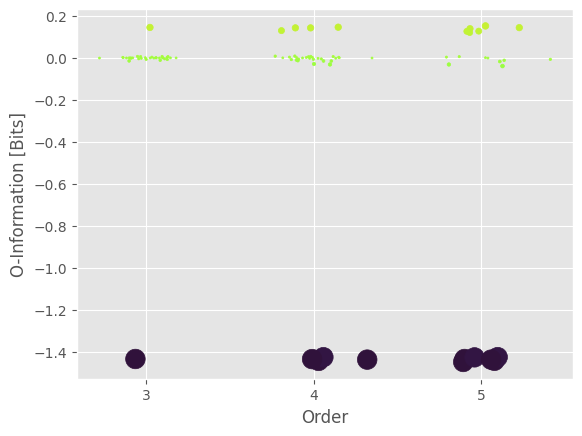

In [5]:
plot_landscape(
    hoi,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)
plt.show()

# Here, we use another toolbox, to plot the computed higher-order interactions

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x23d5f342710>,
  <matplotlib.collections.PatchCollection at 0x23d5f26e510>))

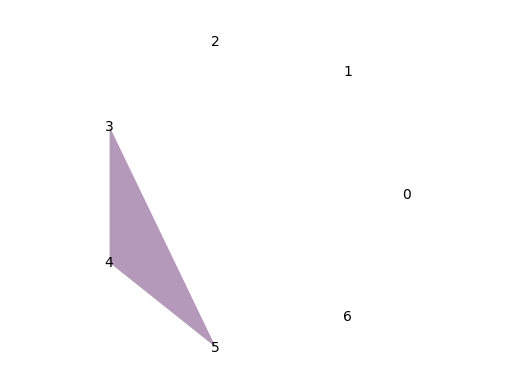

In [6]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_pos][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_pos][::-1], node_size=0, edge_fc_cmap='viridis')

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x23d5f3df390>,
  <matplotlib.collections.PatchCollection at 0x23d5f3df4d0>))

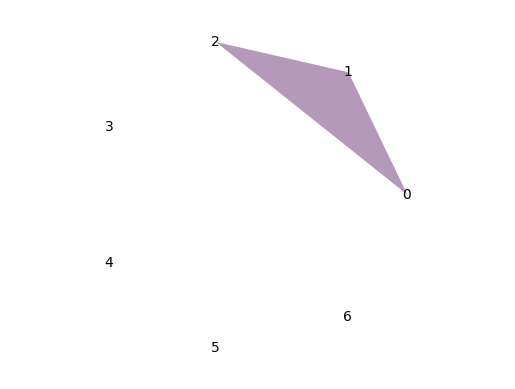

In [7]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_neg][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_neg][::-1], node_size=0, edge_fc_cmap='viridis')

In [9]:
df['multiplet'][index_neg][::-1]

5    [0, 1, 2]
Name: multiplet, dtype: object

In [8]:
df

,index,order,hoi,multiplet
0,31,3,0.144897,"[3, 4, 5]"
1,5,3,0.006798,"[0, 2, 3]"
2,25,3,0.006522,"[2, 3, 4]"
3,26,3,-0.011480,"[2, 3, 5]"
4,33,3,-0.014622,"[3, 5, 6]"
5,0,3,-1.435151,"[0, 1, 2]"
